# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión lineal: Lección 4**
### **Asunciones**

---

In [1]:

# Tratamiento de datos
# --------------------
import numpy as np
import pandas as pd

# Gráficos
# --------
import matplotlib.pyplot as plt
import seaborn as sns

# Para navegar entre directorios
# ----------------------------------
import os

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
import researchpy as rp
from scipy.stats import levene

# Asunciones
from itertools import combinations


# Establecer tamaño fijo de gráficas
# ----------------------------------
plt.rcParams["figure.figsize"] = (8,8)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


In [2]:
os.getcwd()

'/mnt/c/Users/lidya/Documents/Nuestros documentos/Documentos de Lidya/Estudios/Adalab/modulos/modulo3/pair_programming/promo-d-da-modulo3-sprint1-elisa-lidya/regresion-lineal'

In [3]:
os.chdir('/mnt/c/Users/lidya/Documents/Nuestros documentos/Documentos de Lidya/Estudios/Adalab/modulos/modulo3/pair_programming/promo-d-da-modulo3-sprint1-elisa-lidya/regresion-lineal')


In [4]:
df_socio = pd.read_csv("../datos/esperanza_de_vida.csv", index_col=0)
df_socio.head(50)

,country,region,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,health_physicians,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pop_using_improved_drinking_water_urban,pop_using_improved_drinking_water_rural,pollution_index,life_expectancy_at_birth_total
0,Argentina,SouthAmerica,44.271,16.2,91.749,14564.5,4.80,73.30,3.80,Muchos,139.59,58.40,37.37,96.20,98.30,53.33,76.372000
1,Australia,Oceania,24.451,3.2,85.904,51352.2,9.40,74.25,3.40,Medios,176.54,101.94,57.58,100.00,100.00,24.58,82.500000
2,Austria,WesternEurope,8.736,106.0,58.094,44117.7,11.20,80.91,5.20,Muchos,190.37,95.66,80.75,100.00,100.00,21.90,81.643902
3,Belarus,EasternEurope,9.468,46.7,78.134,5750.8,5.70,53.76,4.10,Muchos,119.23,36.43,77.74,94.10,95.20,39.64,74.129268
4,Belgium,WesternEurope,11.429,377.5,97.961,40277.8,10.60,78.92,3.00,Medios,160.52,91.02,55.49,99.50,99.40,48.92,81.492683
5,Bosnia and Herzegovina,SouthernEurope,3.507,68.8,47.876,4265.0,9.60,61.49,1.90,Muy pocos,139.14,51.29,59.03,98.90,92.00,60.69,77.128000
6,Brazil,SouthAmerica,209.288,25.0,86.309,8528.3,8.30,51.70,1.90,Muy pocos,96.15,42.38,29.38,88.00,51.50,61.17,75.456000
7,Bulgaria,EasternEurope,7.085,65.3,74.669,6846.8,8.40,54.03,4.00,Muchos,138.20,51.40,59.82,86.80,83.70,63.12,74.814634
8,Canada,NorthernAmerica,36.624,4.0,81.350,43205.6,10.40,69.23,2.50,Pocos,167.18,108.01,60.75,100.00,99.00,26.54,81.948780
9,Chile,SouthAmerica,18.055,24.3,87.490,13416.2,7.80,60.97,3.36,Medios,136.20,61.28,52.50,100.00,90.90,67.67,79.909000


In [5]:
df_socio.tail(16)

,country,region,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,health_physicians,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pop_using_improved_drinking_water_urban,pop_using_improved_drinking_water_rural,pollution_index,life_expectancy_at_birth_total
50,Slovakia,EasternEurope,5.448,113.3,53.751,16082.5,8.1,62.63,3.40,Medios,152.55,64.75,69.82,99.4,98.2,43.51,77.165854
51,Slovenia,SouthernEurope,2.080,103.3,54.273,20689.8,9.2,64.35,2.80,Pocos,175.45,78.23,75.95,99.1,99.1,26.37,81.029268
52,South Africa,SouthernAfrica,56.717,46.8,65.850,5773.0,8.8,61.72,0.80,Muy pocos,144.72,98.96,24.28,69.6,60.5,63.56,63.538000
53,Spain,SouthernEurope,46.354,92.9,80.080,25865.4,9.0,76.65,3.80,Muchos,183.65,87.87,68.72,99.8,100.0,37.46,83.282927
54,Sri Lanka,SouthernAsia,20.877,332.9,18.384,3973.7,3.5,80.04,1.66,Muy pocos,88.99,30.28,65.43,88.1,96.7,61.90,76.648000
55,Sweden,NorthernEurope,9.911,24.2,87.146,50687.5,11.9,70.64,4.10,Muchos,172.74,107.23,53.35,99.2,99.6,17.87,82.409756
56,Switzerland,WesternEurope,8.476,214.5,73.761,80831.1,11.7,71.04,4.10,Muchos,173.54,95.35,77.55,99.9,99.8,20.77,83.551220
57,Thailand,South-easternAsia,69.038,135.1,49.200,5814.8,4.1,80.66,2.30,Pocos,57.21,34.28,50.22,89.9,96.1,73.23,76.683000
58,The former Yugoslav Republic of Macedonia,SouthernEurope,2.083,82.6,57.748,4836.1,6.5,63.46,2.80,Pocos,116.42,39.85,61.34,97.2,82.6,83.38,75.589000
59,Turkey,WesternAsia,80.745,104.9,74.644,9125.8,5.4,71.68,1.70,Muy pocos,129.63,55.64,58.91,98.3,85.5,70.46,77.161000


El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

 - Normalidad (ya la deberíais haber evaluado)
 - Homogeneidad de varianzas
 - Independencia de las variables

Cada asunción la deberéis testar de forma visual y analítica.

**Asunción de normalidad (comprobación analítica):**

In [6]:
stats.shapiro(df_socio["life_expectancy_at_birth_total"])

ShapiroResult(statistic=0.9383593201637268, pvalue=0.0026618840638548136)

`Como nuestro pvalue es de 0.0026, comprobamos que es menor de 0.05, por lo que podemos rechazar la hipótesis nula y asumimos que nuestros datos no son normales.`

**Asunción de normalidad (comprobación visual):**

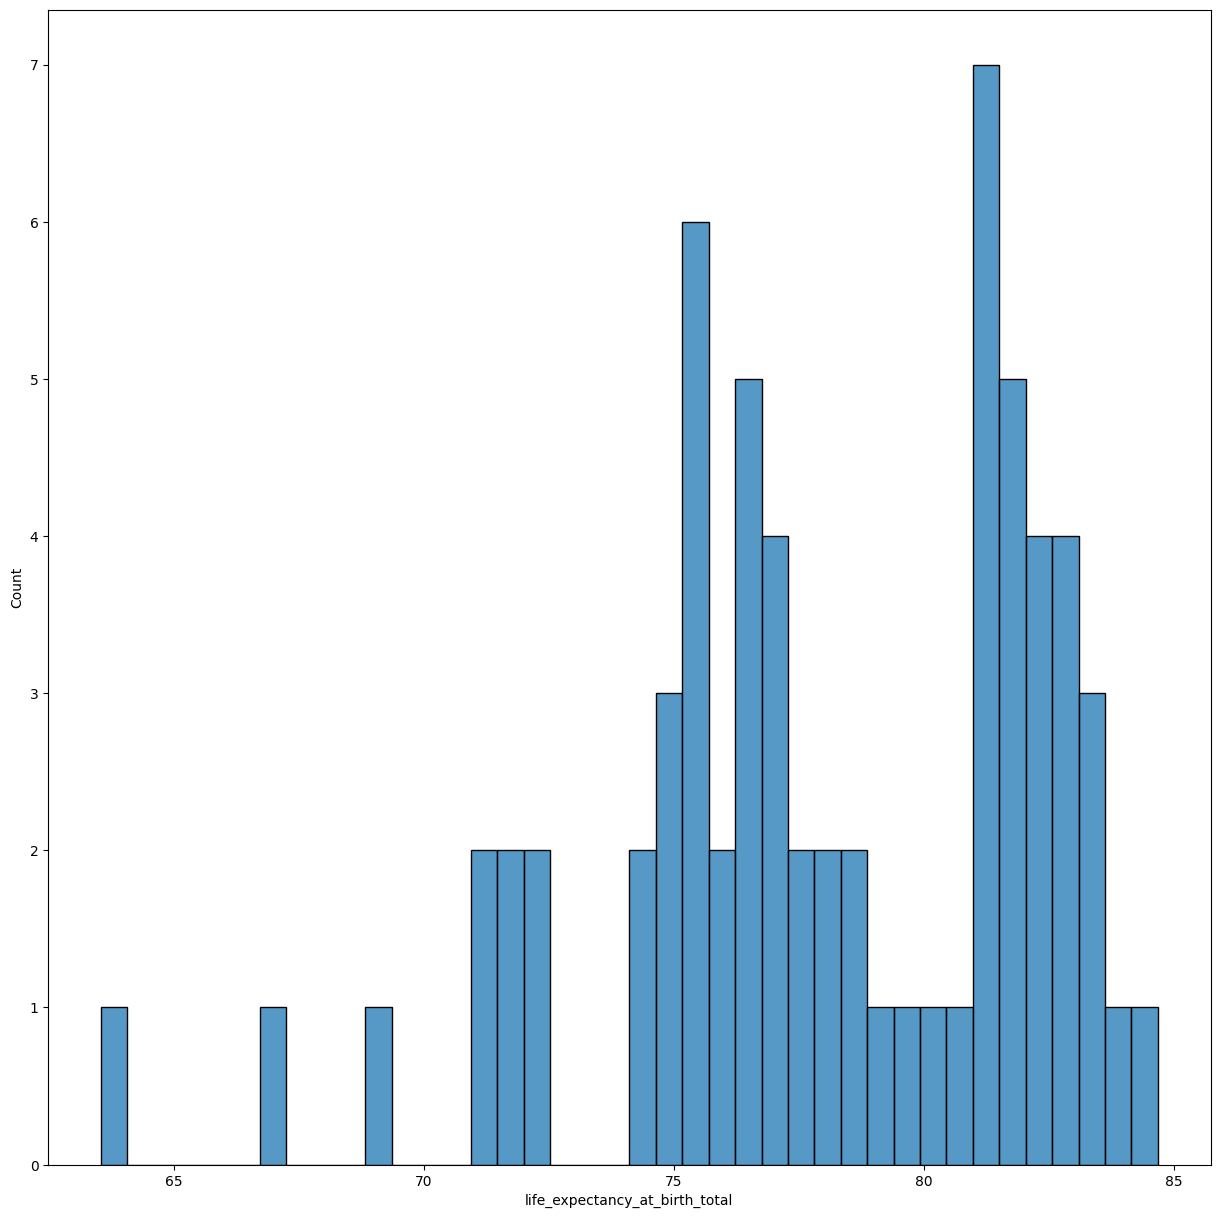

In [7]:
sns.histplot(x=df_socio["life_expectancy_at_birth_total"], bins = 40);

`Comprobamos visualmente que nuestros datos no tienen una distribución normal.`

**Asunción de homocedasticidad (comprobación analítica):**

In [8]:
resultados = {}

numericas_col = df_socio.select_dtypes(include = np.number).drop("life_expectancy_at_birth_total", axis = 1).columns

for col in numericas_col:

    statistic, p_val = levene(df_socio[col], df_socio['life_expectancy_at_birth_total'], center='median')

    resultados[col] = p_val
    
resultados

{'population_in_millions': 0.00973007802552614,
 'population_density': 0.049537762483638066,
 'urban_population_y': 1.680081775932959e-11,
 'gdp_per_capita': 2.9276196773635808e-15,
 'health_total_expenditure': 0.00018270538005963225,
 'health_care_index': 8.541260982440067e-08,
 'health_physicians': 1.3767062313389949e-13,
 'quality_of_life_index': 6.1682184765906774e-15,
 'purchasing_power_index': 1.0502360837978383e-21,
 'safety_index': 2.852943260695837e-09,
 'pop_using_improved_drinking_water_urban': 0.19062591374698443,
 'pop_using_improved_drinking_water_rural': 0.00033771899550871554,
 'pollution_index': 7.838870128095901e-20}

In [9]:
df_socio["region"].unique()

array(['SouthAmerica', 'Oceania', 'WesternEurope', 'EasternEurope',
       'SouthernEurope', 'NorthernAmerica', 'EasternAsia', 'WesternAsia',
       'NorthernEurope', 'NorthernAfrica', 'SouthernAsia',
       'South-easternAsia', 'CentralAmerica', 'SouthernAfrica'],
      dtype=object)

In [10]:
SouthAmerica = df_socio[df_socio["region"] == 'SouthAmerica']["life_expectancy_at_birth_total"]
Oceania = df_socio[df_socio["region"] == 'Oceania']["life_expectancy_at_birth_total"]
WesternEurope = df_socio[df_socio["region"] == 'WesternEurope']["life_expectancy_at_birth_total"]
EasternEurope = df_socio[df_socio["region"] == 'EasternEurope']["life_expectancy_at_birth_total"]
SouthernEurope = df_socio[df_socio["region"] == 'SouthernEurope']["life_expectancy_at_birth_total"]
NorthernAmerica = df_socio[df_socio["region"] == 'NorthernAmerica']["life_expectancy_at_birth_total"]
EasternAsia = df_socio[df_socio["region"] == 'EasternAsia']["life_expectancy_at_birth_total"]
WesternAsia = df_socio[df_socio["region"] == 'WesternAsia']["life_expectancy_at_birth_total"]
NorthernEurope = df_socio[df_socio["region"] == 'NorthernEurope']["life_expectancy_at_birth_total"]
NorthernAfrica = df_socio[df_socio["region"] == 'NorthernAfrica']["life_expectancy_at_birth_total"]
SouthernAsia = df_socio[df_socio["region"] == 'SouthernAsia']["life_expectancy_at_birth_total"]
SoutheasternAsia = df_socio[df_socio["region"] == 'South-easternAsia']["life_expectancy_at_birth_total"]
CentralAmerica = df_socio[df_socio["region"] == 'CentralAmerica']["life_expectancy_at_birth_total"]
SouthernAfrica = df_socio[df_socio["region"] == 'SouthernAfrica']["life_expectancy_at_birth_total"]


In [11]:
levene_test_region = stats.levene(SouthAmerica, Oceania, WesternEurope, EasternEurope, SouthernEurope, NorthernAmerica, EasternAsia, WesternAsia, NorthernEurope, NorthernAfrica, SouthernAsia, SoutheasternAsia, CentralAmerica, SouthernAfrica, center='median')
levene_test_region

LeveneResult(statistic=1.2861814019400974, pvalue=0.25118323231959416)

In [12]:
df_socio["quantity_of_physicians"].unique()

array(['Muchos', 'Medios', 'Muy pocos', 'Pocos'], dtype=object)

In [13]:
muy_pocos = df_socio[df_socio["quantity_of_physicians"] == 'Muy pocos']["life_expectancy_at_birth_total"]
pocos = df_socio[df_socio["quantity_of_physicians"] == 'Pocos']["life_expectancy_at_birth_total"]
medios = df_socio[df_socio["quantity_of_physicians"] == 'Medios']["life_expectancy_at_birth_total"]
muchos = df_socio[df_socio["quantity_of_physicians"] == 'Muchos']["life_expectancy_at_birth_total"]

In [14]:
levene_test_cantidad_medicos = stats.levene(muy_pocos, pocos, medios, muchos, center='median')
levene_test_cantidad_medicos

LeveneResult(statistic=0.5901847615711848, pvalue=0.6237445454283979)

`Las siguientes columna son las únicas que cumplen la asunción de homocedasticidad:`
- Pop. using improved drinking water: urban(%)
- Region
- Quantity of Physicians (per 1000 pop.)

`El resto de las columnas no cumplen la asunción de homocedasticidad, y por lo tanto, tienen una covarianza heterogénea:`
- Population in millions (2017)
- Population density (per km2, 2017) (Aunque este se queda muy cerca)
- Urban population (% of total population)_y
- GDP per capita (current US$)
- Health: Total expenditure (% of GDP)
- Health Care Index
- Health: Physicians (per 1000 pop.)
- Quality Of Life Index
- Purchasing Power Index
- Safety Index
- Pop. using improved drinking water: rural (%)
- Pollution index


**Asunción de homocedasticidad (comprobación visual):**

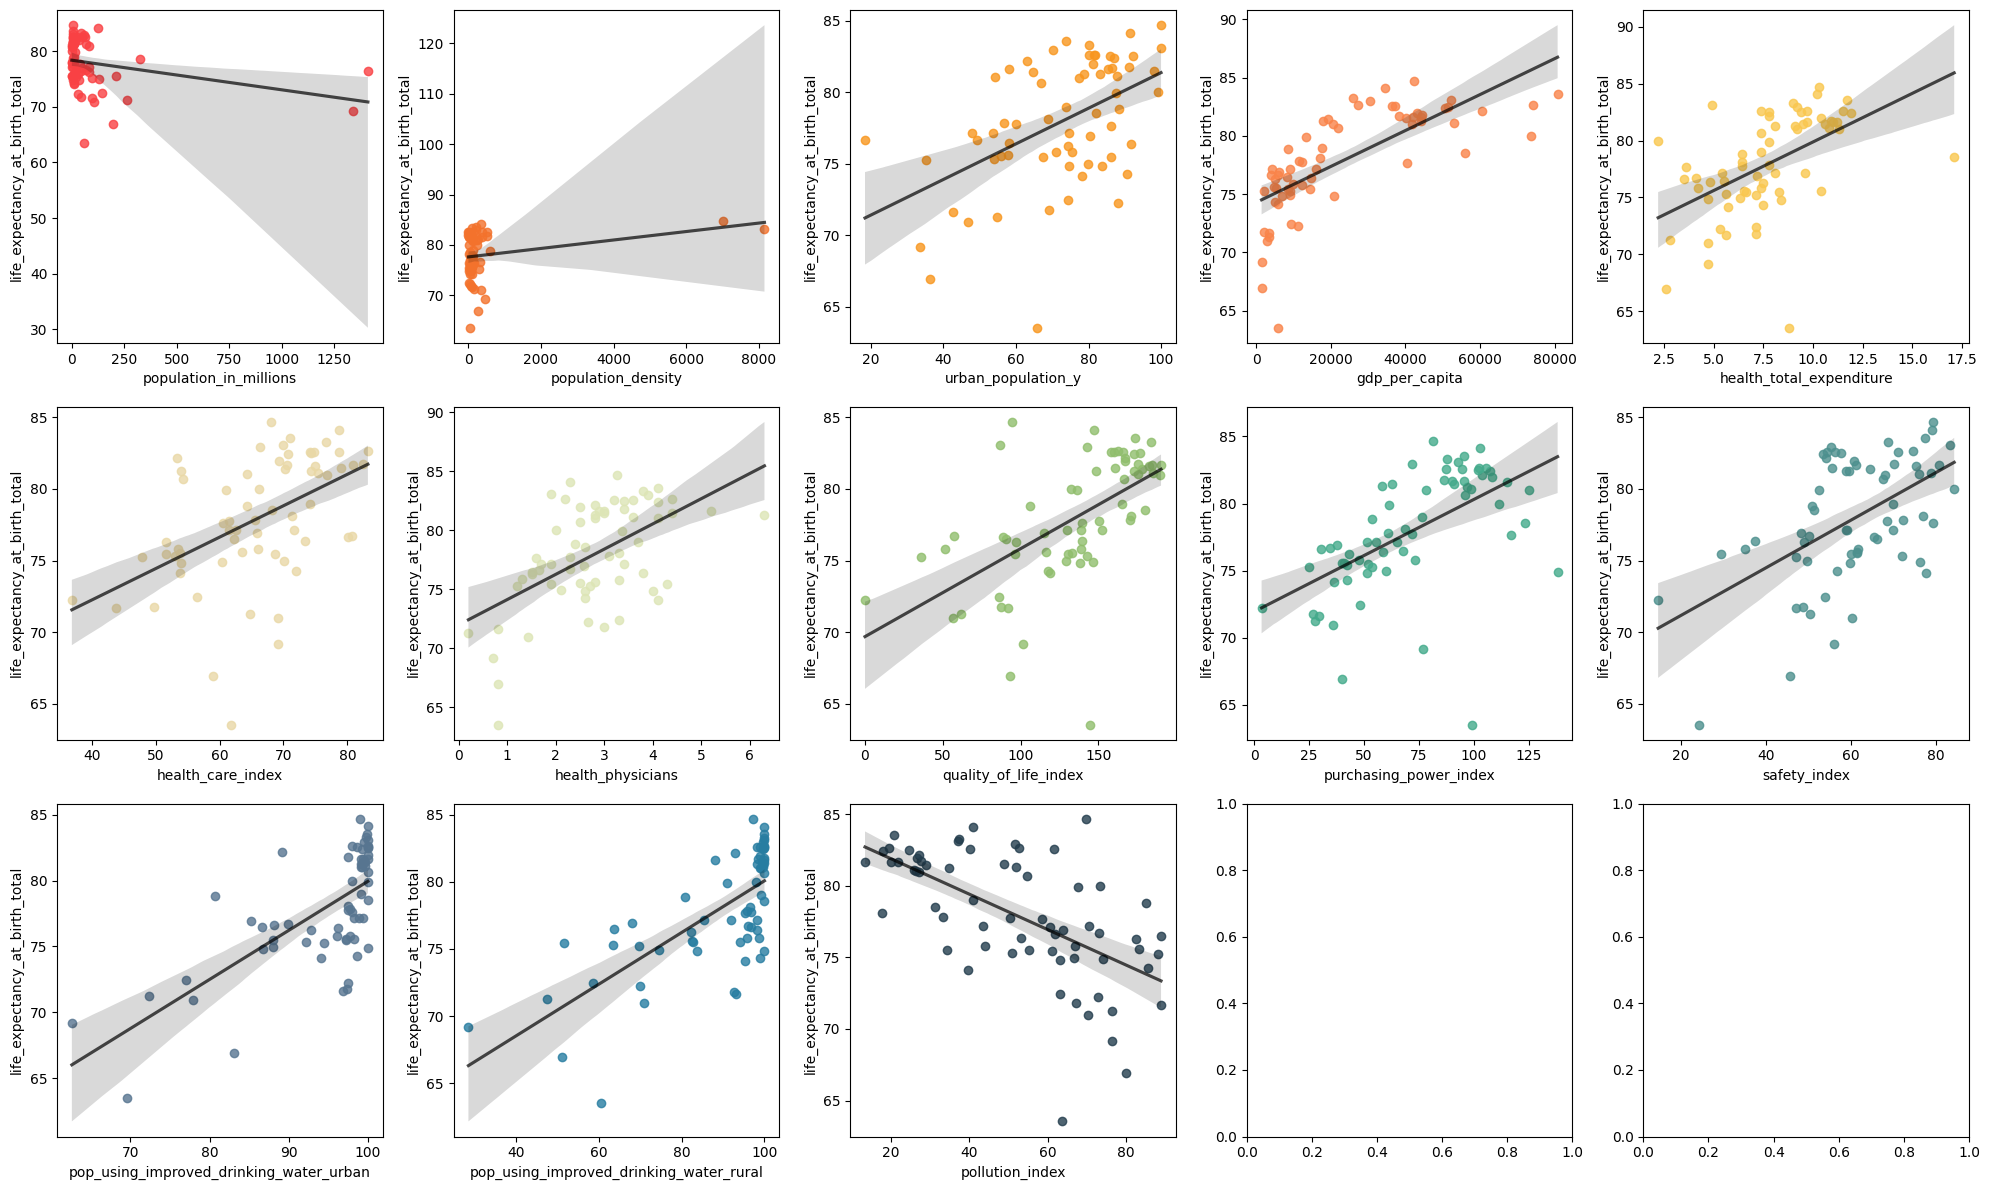

In [15]:
lista_colores = ['#f94144', '#f3722c', '#f8961e', '#f9844a', '#f9c74f', '#e9d8a6', '#dde5b6', '#90be6d', '#43aa8b', '#4d908e', '#577590', '#277da1', '#233d4d']
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (20,12))
axes = axes.flat

for i, colum in enumerate(numericas_col): 
    
    sns.regplot(
        data = df_socio,
        x = colum,
        y = 'life_expectancy_at_birth_total',
        color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    fig.tight_layout()

`En base a lo que vemos en esta gráfica, ninguna de las variables sería homocedástica, porque la dispersión de los valores no nos parece homogénea. Nos llama mucho la atención que la gráfica referente a la población urbana con acceso a agua potable sea tan parecida a su homónima en la vertiente rural, ya que, según nos ha indicado la comprobación analítica mediante el test de Levene, la primera sí sería homocedástica pero la segunda no.`

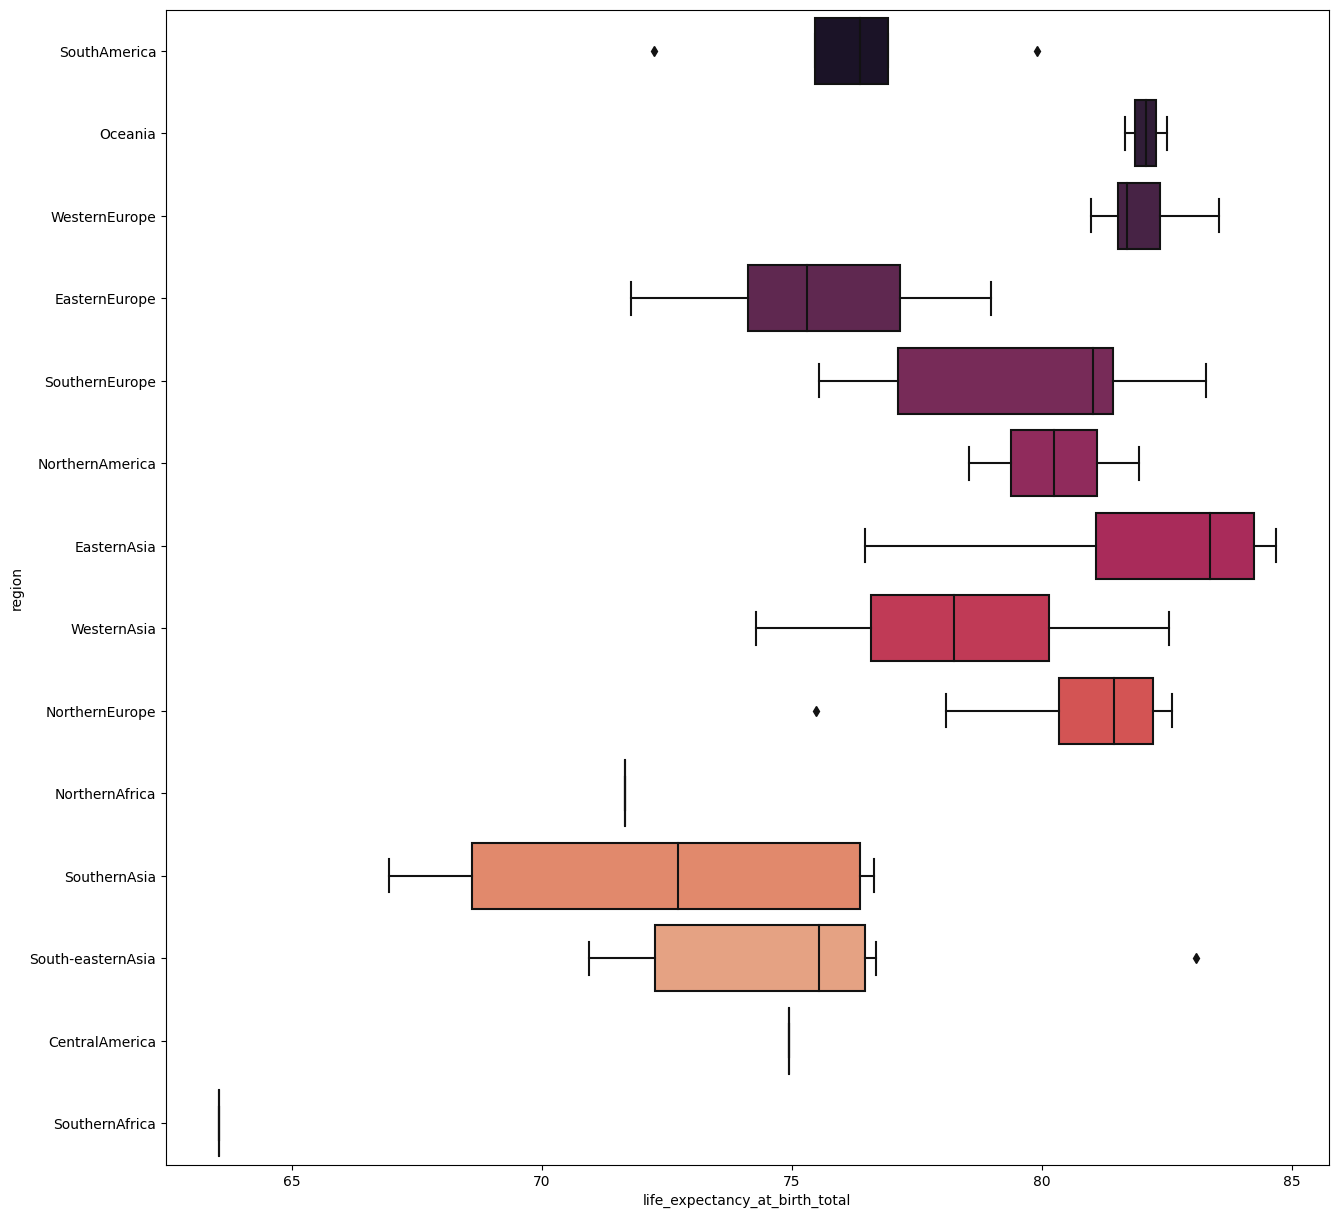

In [16]:
sns.boxplot(y = 'region', x = 'life_expectancy_at_birth_total', data = df_socio, palette = 'rocket');

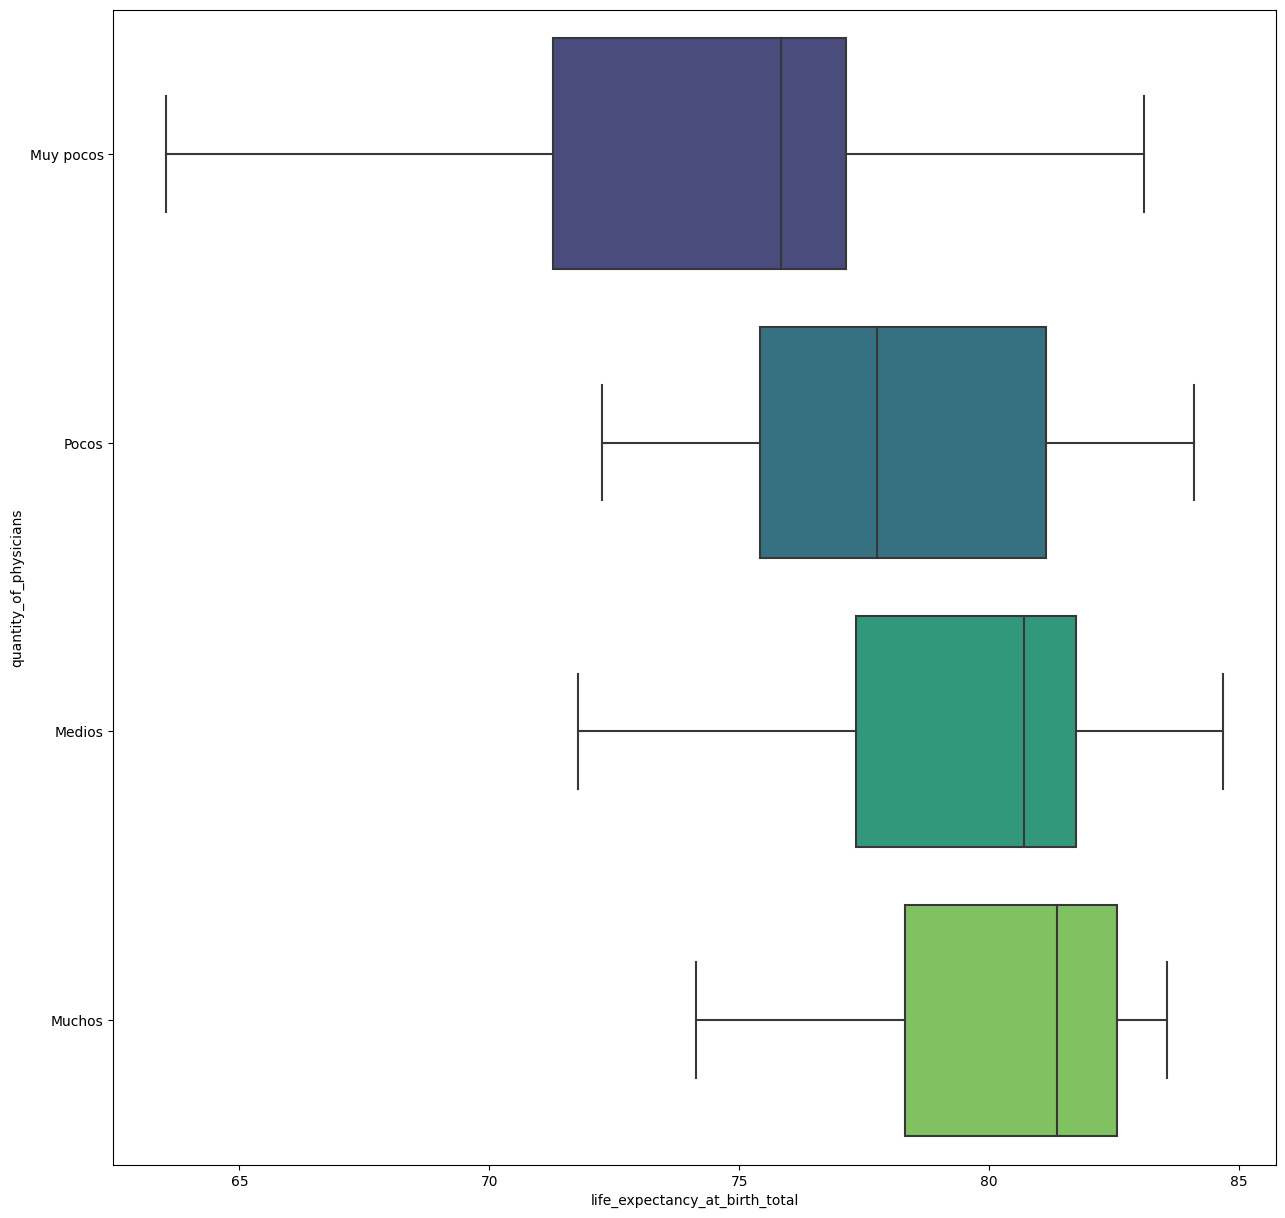

In [17]:
sns.boxplot(y = 'quantity_of_physicians', x = 'life_expectancy_at_birth_total', data = df_socio, palette = 'viridis', order = ["Muy pocos","Pocos", "Medios", "Muchos"]);

`Hemos sacado también boxplots para las dos variables categóricas que nos parecen de interés (ya que la otra, la del nombre del país, se comporta más como un índice que como una variable categórica).`

**Asunción de independencia (comprobación analítica):**

In [18]:
predictoras = df_socio.drop("life_expectancy_at_birth_total", axis=1)

In [19]:
combinaciones = list(combinations(predictoras.columns, 2))
print(combinaciones) 

[('country', 'region'), ('country', 'population_in_millions'), ('country', 'population_density'), ('country', 'urban_population_y'), ('country', 'gdp_per_capita'), ('country', 'health_total_expenditure'), ('country', 'health_care_index'), ('country', 'health_physicians'), ('country', 'quantity_of_physicians'), ('country', 'quality_of_life_index'), ('country', 'purchasing_power_index'), ('country', 'safety_index'), ('country', 'pop_using_improved_drinking_water_urban'), ('country', 'pop_using_improved_drinking_water_rural'), ('country', 'pollution_index'), ('region', 'population_in_millions'), ('region', 'population_density'), ('region', 'urban_population_y'), ('region', 'gdp_per_capita'), ('region', 'health_total_expenditure'), ('region', 'health_care_index'), ('region', 'health_physicians'), ('region', 'quantity_of_physicians'), ('region', 'quality_of_life_index'), ('region', 'purchasing_power_index'), ('region', 'safety_index'), ('region', 'pop_using_improved_drinking_water_urban'), 

In [20]:
lista_dependientes= []
lista_independientes= []

for tupla in combinaciones:

    col1 = tupla[0]
    col2 = tupla[1]

    crosstab_col1_col2, test_results_col1_col2, expected_col1_col2 = rp.crosstab(df_socio[col1], df_socio[col2],
                                                                                                 test= "chi-square",
                                                                                                 expected_freqs= True,
                                                                                                 prop= "cell")
        

    if test_results_col1_col2.iloc[1][1] >= 0.05:
        lista = [col1, col2]
        lista_independientes.append(lista)
        print(f"Las variables {col1} y {col2} son independientes")
    else:
        lista = [col1, col2]
        lista_dependientes.append(lista)
        print(f"Las variables {col1} y {col2} son dependientes")
    
    print("---------------------------")
    

Las variables country y region son independientes
---------------------------
Las variables country y population_in_millions son independientes
---------------------------
Las variables country y population_density son independientes
---------------------------
Las variables country y urban_population_y son independientes
---------------------------
Las variables country y gdp_per_capita son independientes
---------------------------
Las variables country y health_total_expenditure son independientes
---------------------------
Las variables country y health_care_index son independientes
---------------------------
Las variables country y health_physicians son independientes
---------------------------
Las variables country y quantity_of_physicians son independientes
---------------------------
Las variables country y quality_of_life_index son independientes
---------------------------
Las variables country y purchasing_power_index son independientes
---------------------------
Las var

In [21]:
lista_dependientes

[['region', 'health_total_expenditure'],
 ['region', 'quantity_of_physicians'],
 ['health_total_expenditure', 'pop_using_improved_drinking_water_urban'],
 ['health_physicians', 'quantity_of_physicians'],
 ['health_physicians', 'pop_using_improved_drinking_water_urban'],
 ['health_physicians', 'pop_using_improved_drinking_water_rural'],
 ['pop_using_improved_drinking_water_urban',
  'pop_using_improved_drinking_water_rural']]

**Asunción de independencia (comprobación visual):**

In [22]:
predictoras.shape

(66, 16)

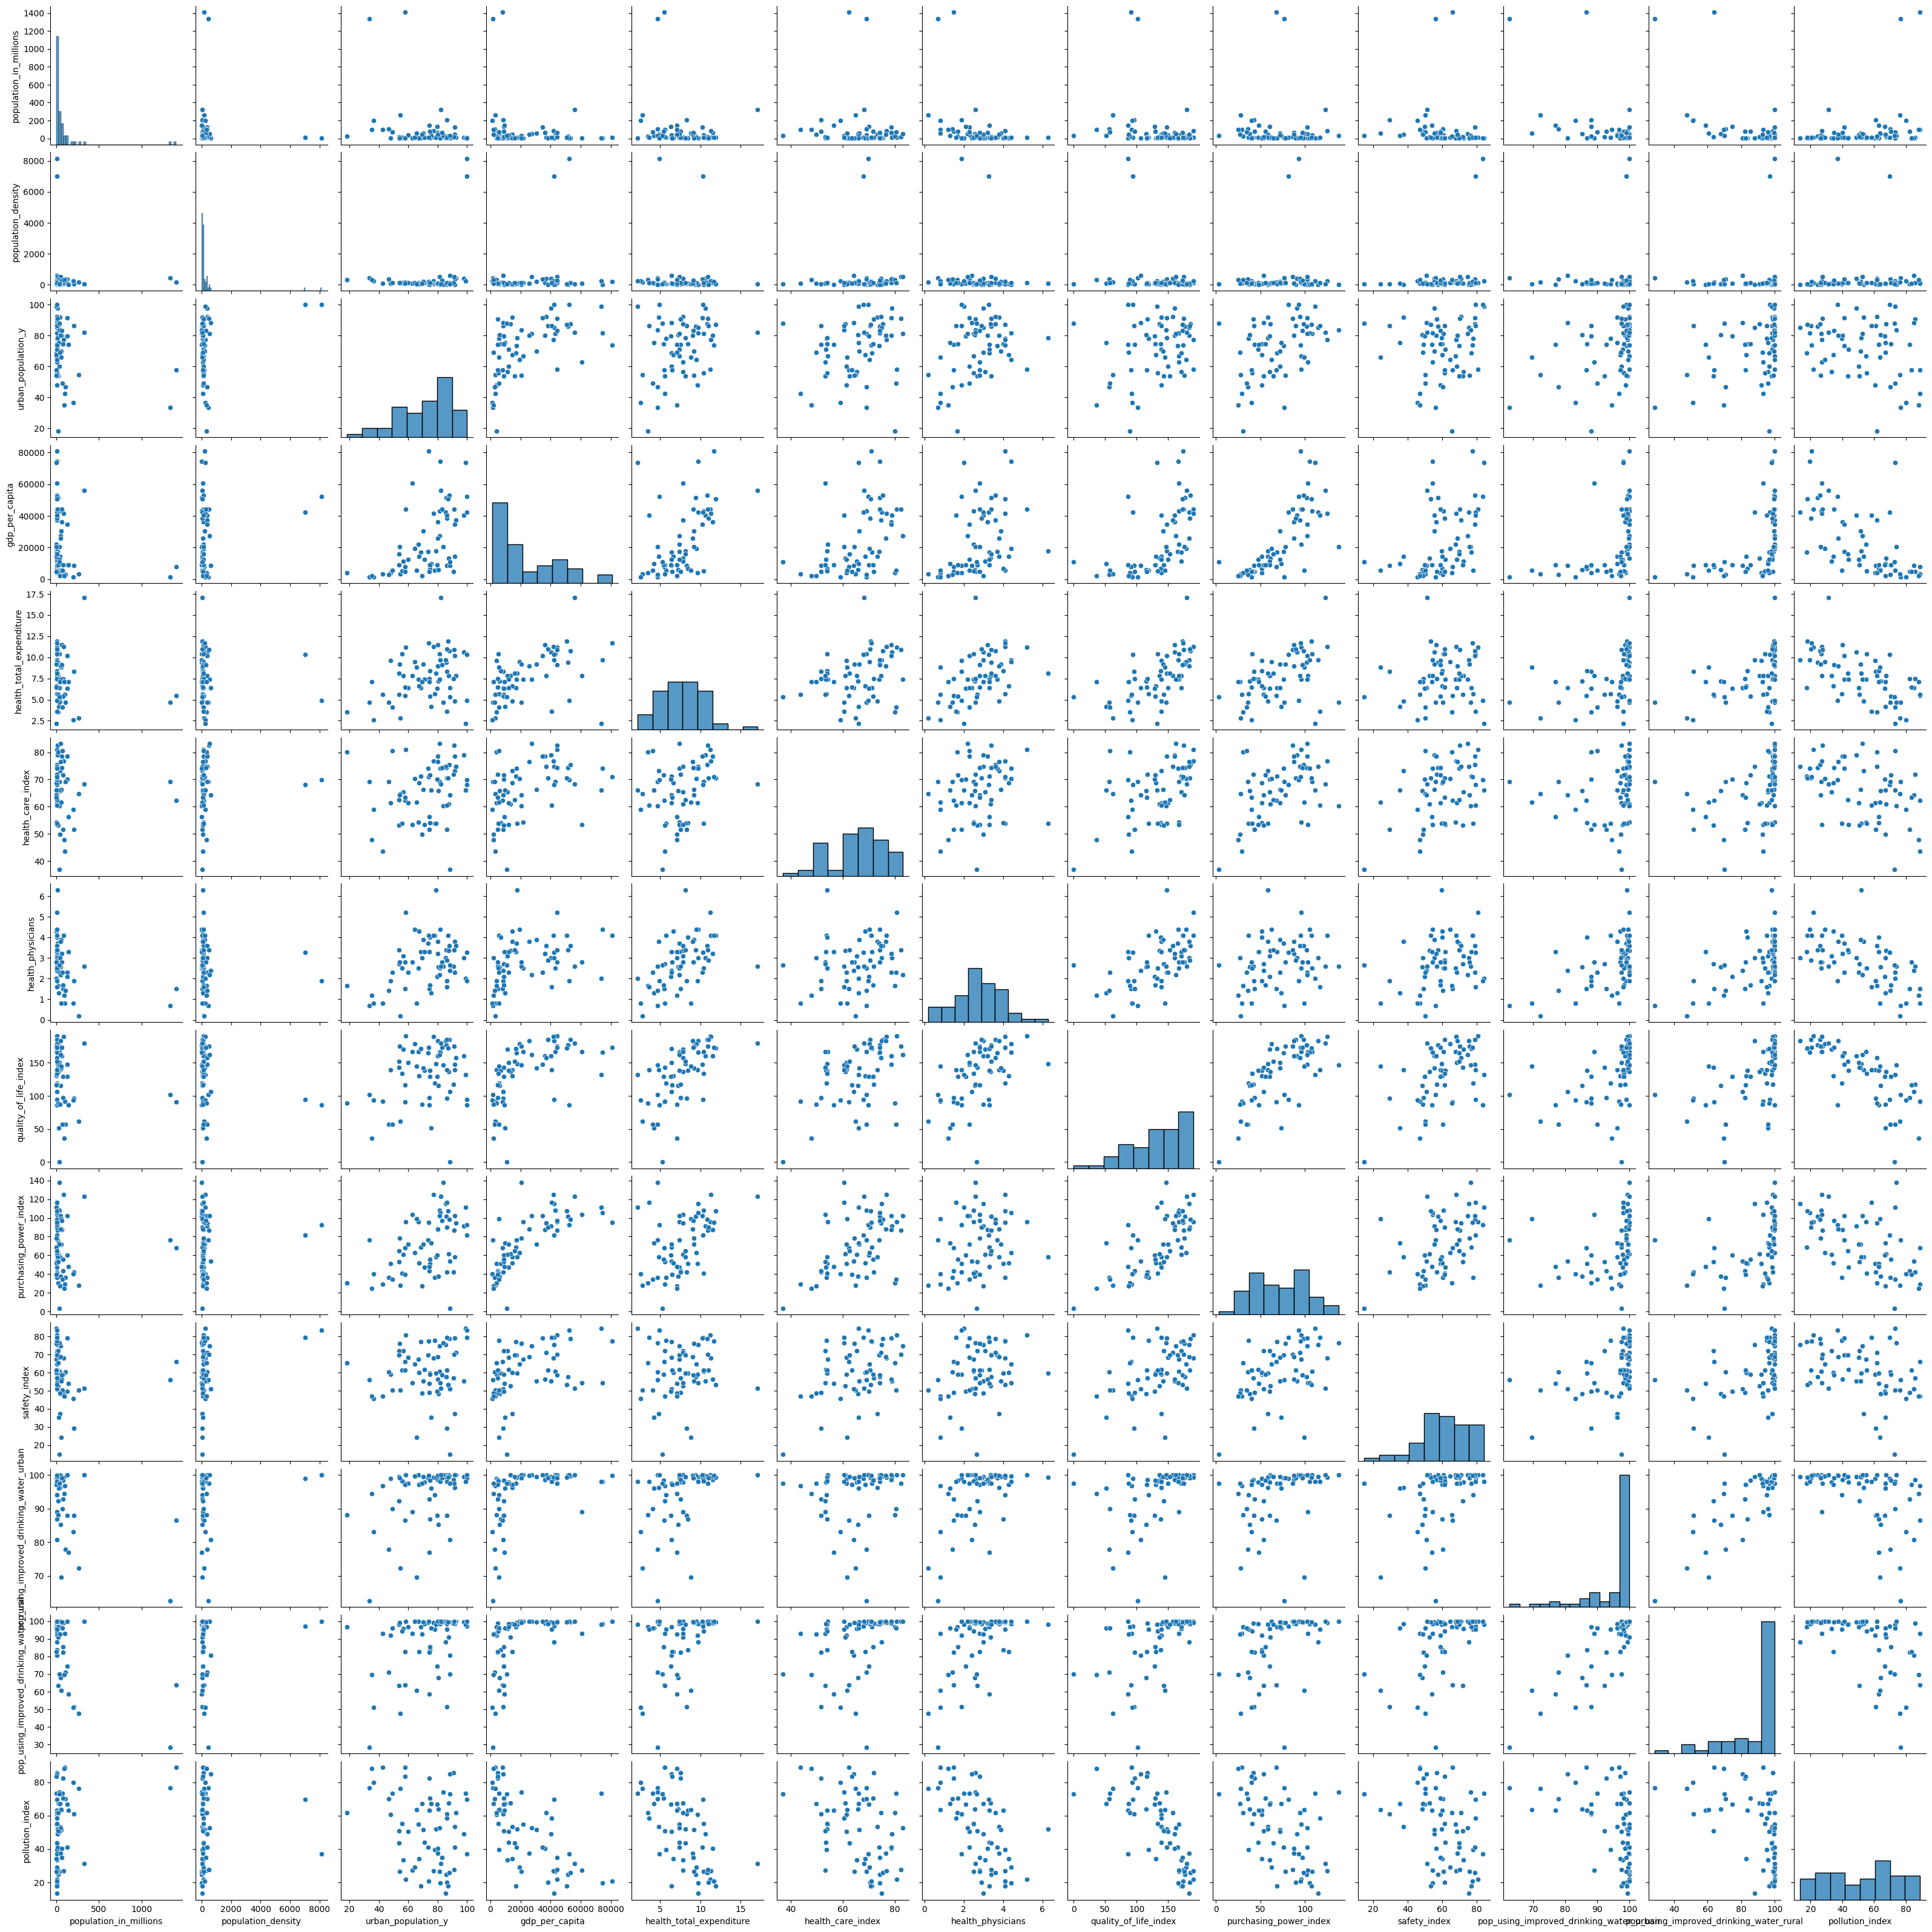

In [23]:
sns.pairplot(data = predictoras);

**CORRECCIÓN DE COLUMNAS DEPENDIENTES**
Modificación realizada el 11/05 después de realizar un primer modelo de regresión lineal.
Este modelo nos da fallos porque estas columnas no fueron tratadas en su momento, de modo que decidimos volver atrás para intentar ajustarlo.

Al observar las columnas dependientes, nos damos cuenta de que podemos unificar las dos columnas referentes al acceso a agua potable (en entornos urbanos y en entornos rurales). Del mismo modo, vemos que tenemos las dos columnas referentes a la cantidad de médicos por cada 1000 habitantes, una en formato numérico y otra en formato categótico. 

A continuación, hacemos las modificaciones necesarias para eliminar estas columnas dependientes:

In [24]:
#Recordamos nuestra lista de columnas dependientes
lista_dependientes

[['region', 'health_total_expenditure'],
 ['region', 'quantity_of_physicians'],
 ['health_total_expenditure', 'pop_using_improved_drinking_water_urban'],
 ['health_physicians', 'quantity_of_physicians'],
 ['health_physicians', 'pop_using_improved_drinking_water_urban'],
 ['health_physicians', 'pop_using_improved_drinking_water_rural'],
 ['pop_using_improved_drinking_water_urban',
  'pop_using_improved_drinking_water_rural']]

In [26]:
df_socio["pop_using_improved_drinking_water"] = (df_socio['pop_using_improved_drinking_water_urban'] + df_socio['pop_using_improved_drinking_water_rural']) / 2
df_socio.drop(['pop_using_improved_drinking_water_urban', 'pop_using_improved_drinking_water_rural', 'health_physicians'], axis = 1, inplace = True)

In [27]:
df_socio.head(1)

,country,region,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pollution_index,life_expectancy_at_birth_total,pop_using_improved_drinking_water
0,Argentina,SouthAmerica,44.271,16.2,91.749,14564.5,4.8,73.3,Muchos,139.59,58.4,37.37,53.33,76.372,97.25


In [29]:
predictoras_corregidas = df_socio.drop("life_expectancy_at_birth_total", axis=1)
combinaciones_corregidas = list(combinations(predictoras_corregidas.columns, 2))

lista_dependientes_corregida= []
lista_independientes_corregida= []

for tupla in combinaciones_corregidas:

    col1 = tupla[0]
    col2 = tupla[1]

    crosstab_col1_col2, test_results_col1_col2, expected_col1_col2 = rp.crosstab(df_socio[col1], df_socio[col2],
                                                                                                 test= "chi-square",
                                                                                                 expected_freqs= True,
                                                                                                 prop= "cell")
        

    if test_results_col1_col2.iloc[1][1] >= 0.05:
        lista = [col1, col2]
        lista_independientes.append(lista)
        print(f"Las variables {col1} y {col2} son independientes")
    else:
        lista = [col1, col2]
        lista_dependientes.append(lista)
        print(f"Las variables {col1} y {col2} son dependientes")
    
    print("---------------------------")

Las variables country y region son independientes
---------------------------
Las variables country y population_in_millions son independientes
---------------------------
Las variables country y population_density son independientes
---------------------------
Las variables country y urban_population_y son independientes
---------------------------
Las variables country y gdp_per_capita son independientes
---------------------------
Las variables country y health_total_expenditure son independientes
---------------------------
Las variables country y health_care_index son independientes
---------------------------
Las variables country y quantity_of_physicians son independientes
---------------------------
Las variables country y quality_of_life_index son independientes
---------------------------
Las variables country y purchasing_power_index son independientes
---------------------------
Las variables country y safety_index son independientes
---------------------------
Las variable

In [30]:
lista_dependientes_corregida

[]

In [31]:
# Guardamos el df corregido para usarlo en las siguientes lecciones.

df_socio.to_csv("../datos/esperanza_de_vida.csv")